In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
test = pd.read_csv('D:\dicoding_praktikum\walmart.csv')
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [4]:
test['User_ID'] = test['User_ID'].astype("object")
test['Occupation'] = test['Occupation'].astype("object")
test['Marital_Status'] = test['Marital_Status'].astype("object")
#test['Product_Category'] = test['Product_Category'].astype("object")

In [5]:
test.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [6]:
test.describe()

,Product_Category,Purchase
count,550068.000000,550068.000000
mean,5.404270,9263.968713
std,3.936211,5023.065394
min,1.000000,12.000000
25%,1.000000,5823.000000
50%,5.000000,8047.000000
75%,8.000000,12054.000000
max,20.000000,23961.000000


In [7]:
test.duplicated().sum()

0

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 42.0+ MB


In [9]:
#diatas itulah data assesing. Sekarang kita memasuki Exploratory Data Analytics

In [10]:
#kelompok umur yang paling banyak melakukan pembelian
test.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [11]:
mode_ages = test['Age'].mode()[0]
print(mode_ages)

26-35


In [12]:
age_mode_mean = np.array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35])

In [13]:
age_mode_mean.mean()

30.5

In [14]:
test.Gender.value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [15]:
male = 414259
female = 135809
total_gender = male + female

persentase_M = (male / total_gender) * 100
persentase_F = (female / total_gender) * 100

print(f"Persentase M: {persentase_M:.2f}%")
print(f"Persentase F: {persentase_F:.2f}%")

Persentase M: 75.31%
Persentase F: 24.69%


In [16]:
#pengaruh kategori data terhadap pembelian

In [17]:
test.City_Category.value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [18]:
test.groupby(by="City_Category").User_ID.nunique().sort_values(ascending=False)

City_Category
C    3139
B    1707
A    1045
Name: User_ID, dtype: int64

In [19]:
test.groupby(by="City_Category").User_ID.count()

City_Category
A    147720
B    231173
C    171175
Name: User_ID, dtype: int64

In [20]:
test.groupby(by="City_Category").agg({
    "Purchase": ["min", "max", "sum"]
}).sort_values(by=("Purchase", "sum"), ascending=False)

Purchase                   
                   min    max         sum
City_Category                            
B                   12  23960  2115533605
C                   12  23961  1663807476
A                   12  23961  1316471661

In [21]:
most_purchased_category = test.groupby('City_Category')['Product_Category'].agg(lambda x: x.mode()[0])

print(most_purchased_category)

City_Category
A    5
B    5
C    1
Name: Product_Category, dtype: int64


In [22]:
#produk yang paling populer di setiap kelompok pelanggan

In [23]:
agg_data = test.groupby(by="Age").agg({
    "Product_Category": ["min", "max", "sum"]
})
most_age_purchased_category = test.groupby('Age')['Product_Category'].agg(lambda x: x.mode()[0])

agg_data['Most_Age_Purchased_Category'] = most_age_purchased_category
agg_data = agg_data.sort_values(by=("Product_Category", "sum"), ascending=False)
print(agg_data)

      Product_Category              Most_Age_Purchased_Category
                   min max      sum                            
Age                                                            
26-35                1  20  1166945                           5
36-45                1  20   604438                           5
18-25                1  20   509371                           5
46-50                1  20   262424                           5
51-55                1  20   222313                           5
55+                  1  20   130450                           8
0-17                 1  20    76775                           5


In [24]:
product_preferention = test.groupby(by="Gender").agg({
    "User_ID": "nunique",
    "Product_Category": ["min", "max"]
})

most_gender_purchased_category = test.groupby('Gender')['Product_Category'].agg(lambda x: x.mode()[0])

product_preferention['Most_Gender_Purchased_Category'] = most_gender_purchased_category
product_preferention = product_preferention.sort_values(by=("User_ID", "nunique"), ascending=False)
print(product_preferention)

       User_ID Product_Category     Most_Gender_Purchased_Category
       nunique              min max                               
Gender                                                            
M         4225                1  20                              1
F         1666                1  20                              5


In [25]:
test.Product_Category.value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [26]:
#lama tinggal di kota mempengaruhi pembelian
test.Stay_In_Current_City_Years.value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [27]:
test.groupby(by="Stay_In_Current_City_Years").User_ID.nunique().sort_values(ascending=False)

Stay_In_Current_City_Years
1     2086
2     1145
3      979
4+     909
0      772
Name: User_ID, dtype: int64

In [28]:
agg_data2 = test.groupby(by="Stay_In_Current_City_Years").agg({
    "User_ID":"nunique",
    "Product_Category": ["min", "max"]
})
most_stay_purchased_category = test.groupby('Stay_In_Current_City_Years')['Product_Category'].agg(lambda x: x.mode()[0])

agg_data2['Most_Stay_Purchased_Category'] = most_stay_purchased_category
agg_data2 = agg_data2.sort_values(by=("User_ID", "nunique"), ascending=False)
print(agg_data2)

                           User_ID Product_Category      \
                           nunique              min max   
Stay_In_Current_City_Years                                
1                             2086                1  20   
2                             1145                1  20   
3                              979                1  20   
4+                             909                1  20   
0                              772                1  20   

                           Most_Stay_Purchased_Category  
                                                         
Stay_In_Current_City_Years                               
1                                                     5  
2                                                     5  
3                                                     5  
4+                                                    5  
0                                                     5  


In [29]:
#pengaruh pekerjaan terhadap pembelian
test.groupby(by="Occupation").User_ID.nunique().sort_values(ascending=False)

Occupation
4     740
0     688
7     669
1     517
17    491
12    376
14    294
20    273
2     256
16    235
6     228
10    192
3     170
13    140
15    140
11    128
5     111
9      88
19     71
18     67
8      17
Name: User_ID, dtype: int64

In [30]:
test.groupby(by="Occupation").agg({
    "User_ID": "nunique",
    "Purchase": ["min", "max", "sum"]
}).sort_values(by=("Purchase", "sum"), ascending=False)

User_ID Purchase                  
           nunique      min    max        sum
Occupation                                   
4              740       12  23961  666244484
0              688       12  23961  635406958
7              669       12  23948  557371587
1              517       12  23960  424614144
17             491       12  23961  393281453
12             376       12  23960  305449446
20             273       12  23960  296570442
14             294       12  23941  259454692
16             235       12  23947  238346955
2              256       12  23955  238028583
6              228       12  23951  188416784
3              170       12  23914  162002168
15             140       12  23949  118960211
10             192       12  23955  115844465
5              111       12  23924  113649759
11             128       12  23946  106751618
19              71       12  23939   73700617
13             140       12  23959   71919481
18              67       12  23894   60721461
9               88       13  23943   54340046
8               17       14  23869   14737388

In [31]:
test.Occupation.value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [32]:
#tren pembelian berdasarkan status pernikahan
test.groupby(by="Marital_Status").User_ID.nunique().sort_values(ascending=False)

Marital_Status
0    3417
1    2474
Name: User_ID, dtype: int64

In [33]:
#kategori produk paling menguntungkan
test.groupby(by="Product_Category").agg({
    "Purchase": ["min", "max", "sum"]
}).sort_values(by=("Purchase", "sum"), ascending=False)

Purchase                   
                      min    max         sum
Product_Category                            
1                    3790  19708  1910013754
5                    1713   8907   941835229
8                    1939  10082   854318799
6                    3981  20690   324150302
2                    3176  16504   268516186
3                    2638  13717   204084713
16                   4036  20971   145120612
11                   1472   7654   113791115
10                   4624  23961   100837301
15                   4148  21569    92969042
7                    4061  21080    60896731
4                     684   3556    27380488
14                   3657  18931    20014696
18                    754   3900     9290201
9                    4528  23531     6370324
17                   2616  13264     5878699
12                    342   1778     5331844
13                    185    962     4008601
20                    118    613      944727
19                     12     62       59378

In [34]:
#Visualisasi Data

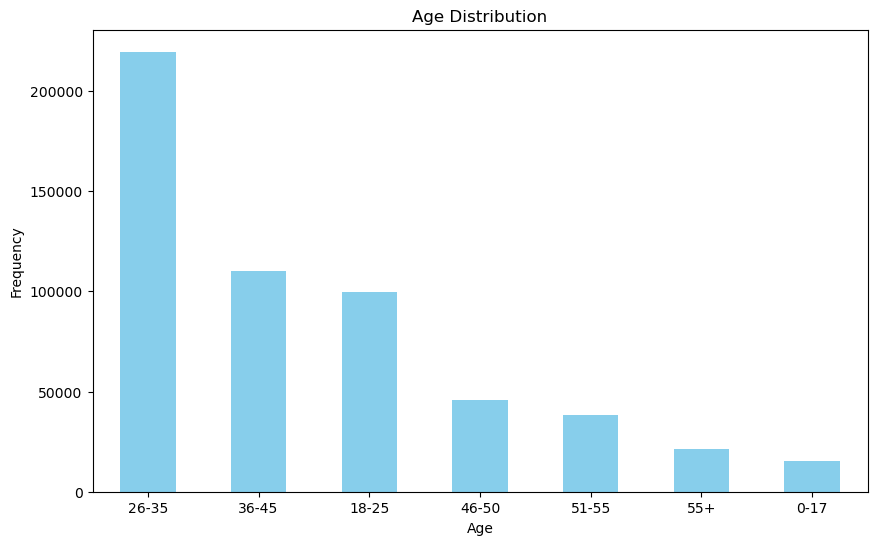

In [35]:
age_counts = test['Age'].value_counts()

# Membuat grafik batang
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Agar label pada sumbu x mudah dibaca
plt.show()

(array([0, 1]), [Text(0, 0, 'M'), Text(1, 0, 'F')])

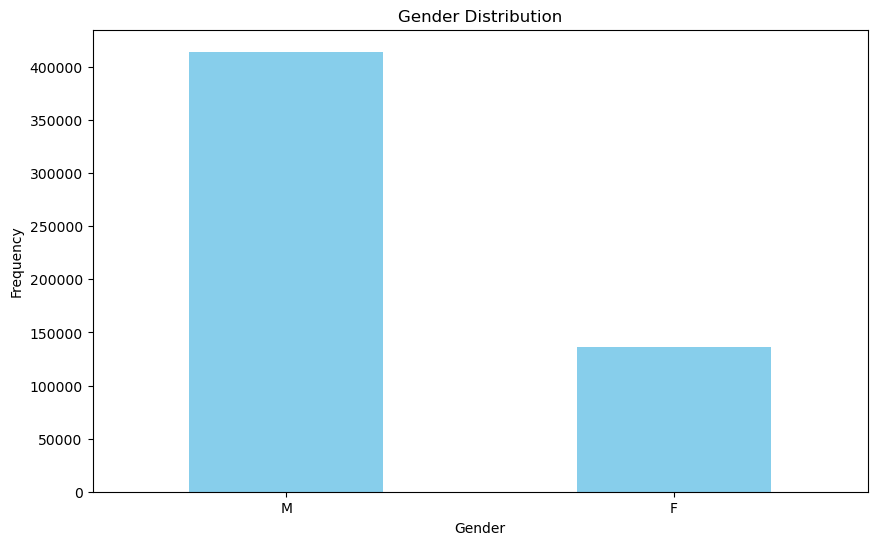

In [36]:
gender_counts = test['Gender'].value_counts()

plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar', color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Agar label pada sumbu x mudah dibaca

In [37]:
#diatas merupakan distribusi usia dan gender

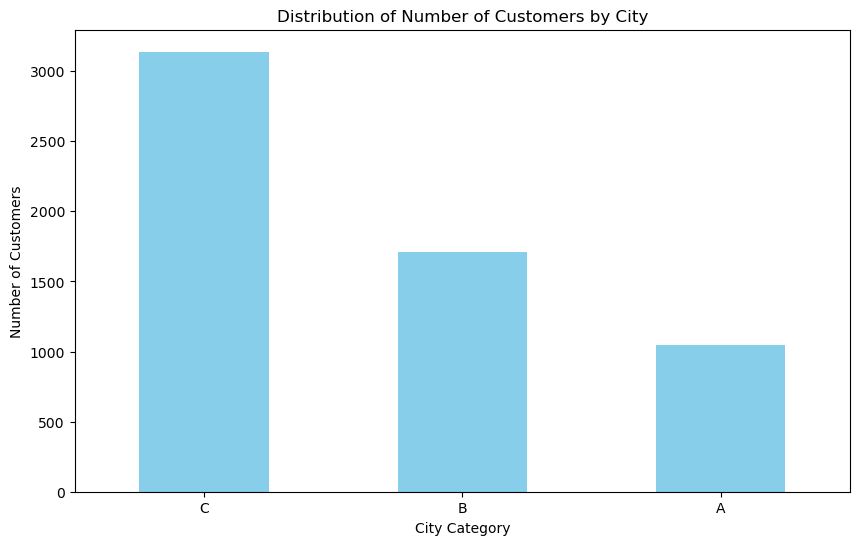

In [38]:
city_category_graph = test.groupby(by="City_Category").User_ID.nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
city_category_graph.plot(kind='bar', color='skyblue')
plt.title('Distribution of Number of Customers by City')
plt.xlabel('City Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)  # Agar label pada sumbu x mudah dibaca
plt.show()

Text(0.5, 1.0, 'Most Purchased Product Category by City Category')

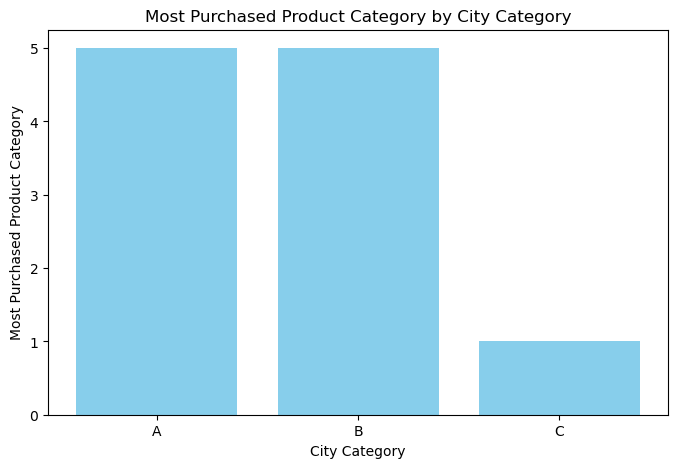

In [39]:
most_purchased_category = most_purchased_category.reset_index()

plt.figure(figsize=(8, 5))
plt.bar(most_purchased_category['City_Category'], most_purchased_category['Product_Category'], color='skyblue')
plt.xlabel('City Category')
plt.ylabel('Most Purchased Product Category')
plt.title('Most Purchased Product Category by City Category')

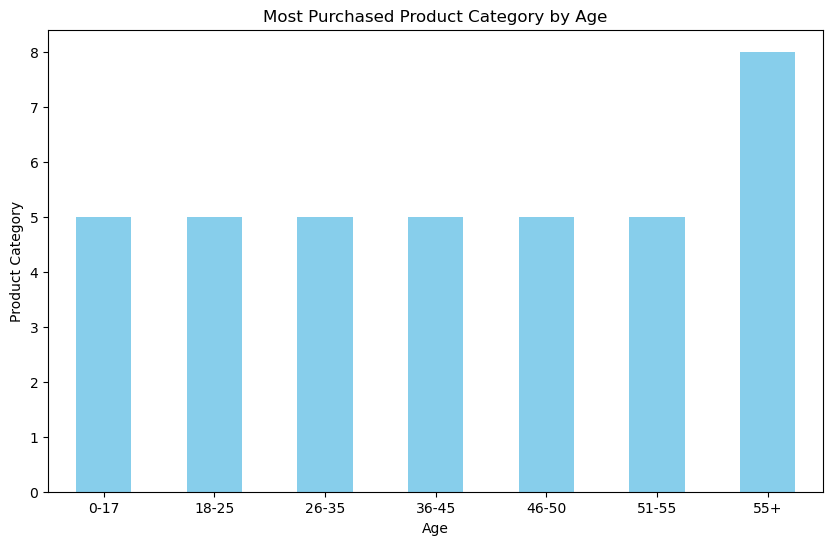

In [40]:
plt.figure(figsize=(10, 6))
most_age_purchased_category.plot(kind='bar', color='skyblue')
plt.title('Most Purchased Product Category by Age')
plt.xlabel('Age')
plt.ylabel('Product Category')
plt.xticks(rotation=0)  # Agar label pada sumbu x mudah dibaca
plt.show()

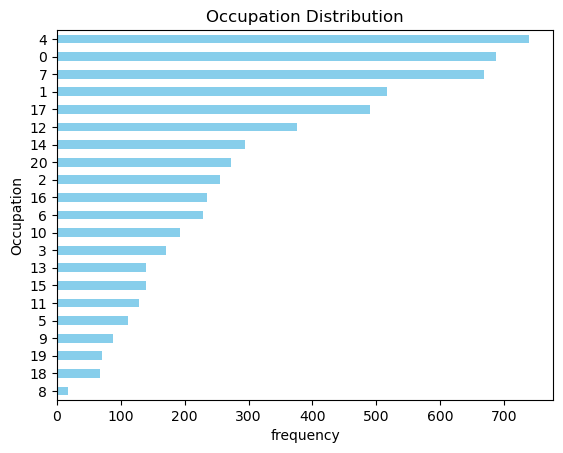

In [47]:
occupation_counts = test.groupby(by="Occupation").User_ID.nunique().sort_values(ascending=False)

occupation_counts.plot(kind='barh', color='skyblue')  # Diagram batang horizontal
plt.title('Occupation Distribution')
plt.xlabel('frequency')
plt.ylabel('Occupation')
plt.gca().invert_yaxis()  # Membalik sumbu Y agar urutan dari atas ke bawah